In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Space params
min_x = -2100
max_x = -1600
min_y = 4200
max_y = 5400
npoints = 500
total_area = abs(max_x - min_x)*abs(max_y - min_y)
# Distribution params
dist_mu = 5
dist_sigma = 0.5
dist_state_types = 10
# Area state borders
state_borders = np.linspace(dist_mu-3*dist_sigma,  
                           dist_mu+3*dist_sigma, dist_state_types)
state_intervals = list(zip(state_borders, state_borders[1:]))

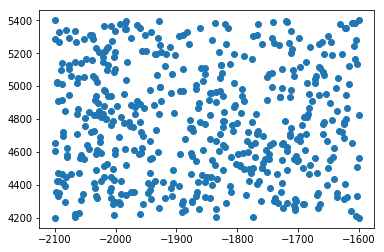

In [2]:
# Fill random points
point_x = np.random.uniform(min_x, max_x, npoints)
point_y = np.random.uniform(min_y, max_y, npoints)
# Add corner points
corner_points = np.array([[min_x, min_x, max_x, max_x], 
                          [min_y, max_y, min_y, max_y]])
coords = np.stack((point_x, point_y))
coords = np.concatenate((coords, corner_points), axis=1).T
plt.scatter(coords[:,0], coords[:,1])
plt.draw()
plt.show()

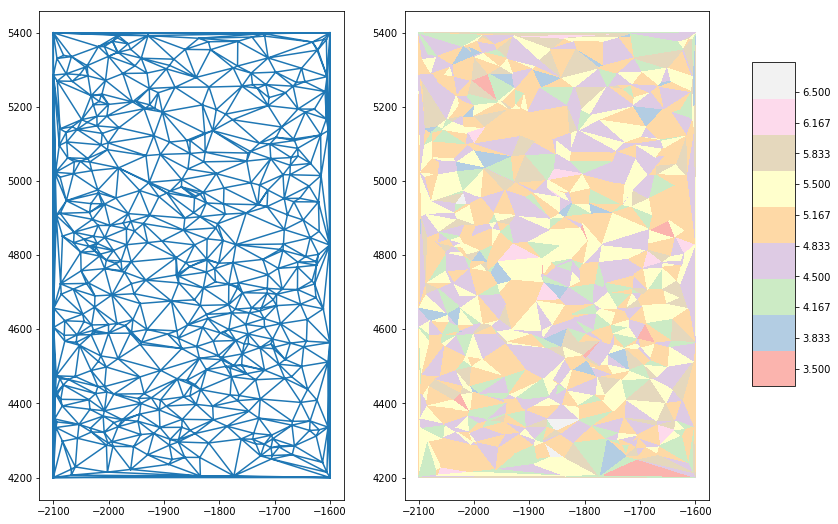

In [3]:
from scipy.spatial import Delaunay

# Triangulate
tri = Delaunay(coords)
triList = coords[tri.simplices] # Triangle coordinates
# Generate random state distribution
triState = np.random.normal(dist_mu, dist_sigma, 
                            tri.simplices.shape[0])

fig, (ax1, ax2) = plt.subplots(1, 2,  figsize=[12, 9])
im1 = ax1.triplot(coords[:,0], coords[:,1], tri.simplices.copy())
im2 = ax2.tripcolor(coords[:,0], coords[:,1], tri.simplices.copy(),
              facecolors=triState, cmap=plt.cm.Pastel1)
cax = fig.add_axes([0.95, 0.3, 0.05, 0.5])
fig.colorbar(im2, ticks = state_borders, cax = cax)

plt.draw()
plt.show()

In [4]:
import functools

def triangle_area(value, x):
    (a,b,c) = np.squeeze(np.asarray(x))
    return value + abs(a[0]*(b[1] - c[1]) + b[0]*(c[1] - a[1])
                       + c[0]*(a[1] - b[1]))/2

def calculate_area(intervals, triangulation, triangle_state):   
    stats = []
    for i,(lower,upper) in enumerate(intervals):
        matches = triangulation[(triangle_state>=lower) & (triangle_state<=upper)]
        area = functools.reduce(triangle_area, matches, 0)
        stats.append(area)
    return stats

In [5]:
print(f"Total area: {total_area}")
res = calculate_area(state_intervals, triList, triState)
for i, area in enumerate(res):
    (lower, upper) = state_intervals[i]
    print(f"Type {i:d} [{lower:.3f},{upper:.3f}]\t area: {area:.3f};\t ratio: {area/total_area*100:06.3f}%")

Total area: 600000
Type 0 [3.500,3.833]	 area: 6885.598;	 ratio: 01.148%
Type 1 [3.833,4.167]	 area: 22613.473;	 ratio: 03.769%
Type 2 [4.167,4.500]	 area: 70814.254;	 ratio: 11.802%
Type 3 [4.500,4.833]	 area: 118224.595;	 ratio: 19.704%
Type 4 [4.833,5.167]	 area: 156306.764;	 ratio: 26.051%
Type 5 [5.167,5.500]	 area: 122843.023;	 ratio: 20.474%
Type 6 [5.500,5.833]	 area: 66232.385;	 ratio: 11.039%
Type 7 [5.833,6.167]	 area: 24171.672;	 ratio: 04.029%
Type 8 [6.167,6.500]	 area: 4079.358;	 ratio: 00.680%
